In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###

from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

import stylised_facts.stylised_facts_data_utilities.createLOB as createLOB

%matplotlib inline
import os
os.getcwd()

'/home/ak/Documents/Research/PaperCode'

In [2]:
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
folderList
symbosl =['FB1','JB1','FV1','G_1']

In [3]:


correlDU1ListOne =list(np.sort([s for s in folderList if ('AtoCor') in s and ('1AtoCorrelData_FB1') in s]))
correlDU1ListZero =list(np.sort([s for s in folderList if ('AtoCor') in s and ('0AtoCorrelData_FB1') in s]))
correlDU1ListTwo =list(np.sort([s for s in folderList if ('AtoCor') in s and ('2AtoCorrelData_FB1') in s]))

In [4]:
# pd=DataFrame.from_dict(list, orient='columns', dtype=None)

In [5]:

DU1CorrelVolBar= []
for idx, _ in enumerate(correlDU1ListOne):
    fileLoc = "".join((folder, correlDU1ListOne[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelVolBar.append(pickle_to_file)


In [6]:
DU1CorrelTickBar= []
for idx, _ in enumerate(correlDU1ListZero):
    fileLoc = "".join((folder, correlDU1ListZero[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelTickBar.append(pickle_to_file)

In [7]:
DU1CorrelDolVolBar= []
for idx, _ in enumerate(correlDU1ListTwo):
    fileLoc = "".join((folder, correlDU1ListTwo[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelDolVolBar.append(pickle_to_file)

In [8]:
dfAutoCorrelOne =pd.DataFrame.from_dict(DU1CorrelVolBar, orient='columns', dtype=None).T
dfAutoCorrelZero =pd.DataFrame.from_dict(DU1CorrelTickBar, orient='columns', dtype=None).T
dfAutoCorrelTwo =pd.DataFrame.from_dict(DU1CorrelDolVolBar, orient='columns', dtype=None).T

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
No handles with labels found to put in legend.
/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


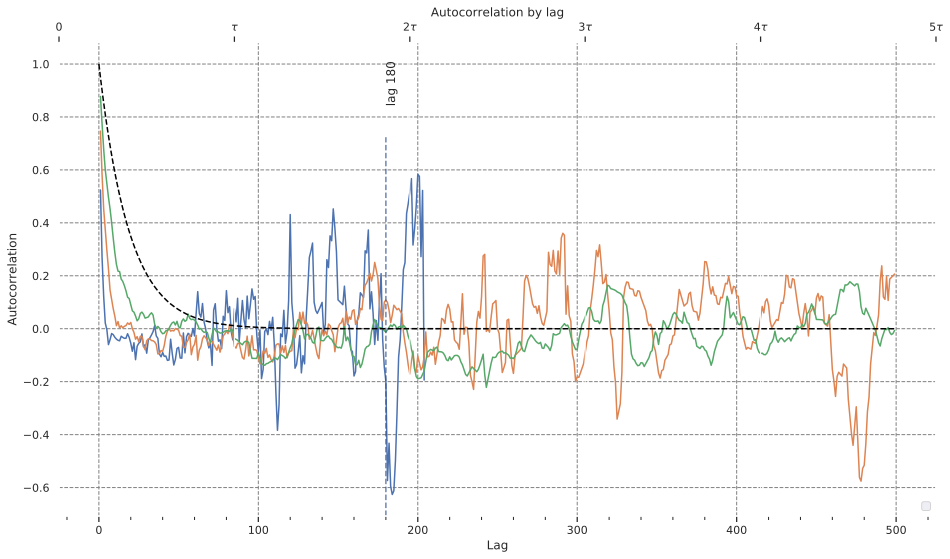

In [9]:
title='MedianAutocorrelationForSymbolFB1'
dfs = [dfAutoCorrelZero, dfAutoCorrelOne, dfAutoCorrelTwo]
from matplotlib.ticker import AutoMinorLocator
size = 5
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 25}
_=fig, ax1 = plt.subplots(figsize=(16, 9),constrained_layout=True)
ax1.grid(color='grey', linestyle='--', linewidth=1)
ax2 = ax1.twiny()
ax1.set_facecolor('white')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
for idx, df in enumerate(dfs):
    ax1.plot( df.median(axis=1))
ax1.set_title('Autocorrelation by lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_xlabel('Lag')
# Initial value of y at t=0, lifetime in s
N, tau = 1, 19
xlineLevel=180
# Maximum time to consider (s)
tmax = 500
ntau = tmax // tau + 1
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 400)
y = N * np.exp(-t / tau)

# fig = plt.figure()
# ax = fig.add_subplot(111)
ax1.plot(t, y, color='black', linestyle='--')
ax1.grid(True)
#     axvline(x=.5, ymin=0.25, ymax=0.75)
_=ax1.axvline(x=xlineLevel, ymin=0.0, ymax=0.8, ls='--', alpha=0.7, color='#334f8d')
_=ax1.text(xlineLevel, 0.85, 'lag ' + str(xlineLevel), rotation=90, fontsize=12)
_=xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2, ntau)]
_=ax1.legend(loc='lower right')
_=ax2.set_xticklabels(xtick_labels)

plt.savefig('/home/ak/Documents/Research/Papers/figures/' + title + '.png', dpi=150)
fig.tight_layout()

In [10]:
type(pickle_to_file)

dict

In [11]:
dots = sns.load_dataset("dots")

NameError: name 'sns' is not defined

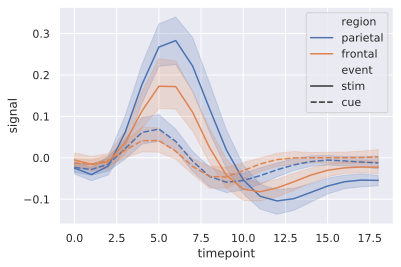

In [12]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [13]:
fmri.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883


In [14]:
folderList = os.listdir(folder)


In [15]:
DU1Clocks =list(np.sort([s for s in folderList if ('Clocks') in s and ('_DU1') in s]))

In [16]:
clocksIdx =1

fileLoc = "".join((folder, DU1Clocks[clocksIdx]))
dFclocksSample = pickle.load(open(fileLoc, "rb"))

In [17]:
sampleKeys = list(dFclocksSample.keys() )
sampleKeys

['OriginalDF', 'TickBarDf', 'VolumeBarDf', 'DollarVolumeBarDf']

In [18]:
dfSampleTick = dFclocksSample[sampleKeys[1]]
dfSampl

In [19]:
import stylised_facts.stylised_facts_data_utilities.createLOB as createLOB
clocksDataList =[s for s in folderList if ('ClocksData') in s]

In [20]:
column='MicroPrice'
ref=dFclocksSample[sampleKeys[0]][str(column)]
sub=dFclocksSample[sampleKeys[1]][str(column)]

In [21]:
ohlcDF =createLOB.get_ohlc(ref, sub)

100%|██████████| 5095/5095 [00:01<00:00, 4025.68it/s]


In [22]:
rogersSatchell=createLOB.Volestim(ohlcDF,window=5).rogersSatchell()
hodgesTompkins=createLOB.Volestim(ohlcDF, window=5).hodgesTompkins()

/home/ak/Documents/Research/PaperCode/stylised_facts/stylised_facts_data_utilities/createLOB/__init__.py:392: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  center=False).apply(func=f)


In [23]:
ohlcDF.head(3)

,End,Start,Open,High,Low,Close
0,9,4,111.900874,111.901160,111.900868,111.901160
1,14,9,111.901160,111.902578,111.901129,111.902578
2,19,14,111.902578,111.902578,111.902569,111.902569


In [24]:

ohlcDF=ohlcDF.set_index('Start')

In [ ]:
quoteTime = dfSampleTick['QuoteTime']
dfSampleTick.shape

In [ ]:
dfSampleTick.index

In [25]:
rogSatchellVol =pd.DataFrame(rogersSatchell)

In [27]:
dfMerged =pd.merge(ohlcDF, dfSampleTick, left_index=True, right_index=True)
#how equal left in quotes

In [28]:
dfMerged.head(3)

,End,Open,High,Low,Close,BidQuoteId,BidSize,QuoteTime,type_x,BestBid,...,TradedTime,type,TradePrice,TradeId,TimeStamp,milliSeconds,DollarVolume,MicroPrice,TradeSize,DollarVolumeTraded
4,9,111.900874,111.901160,111.900868,111.901160,11,2345,2018-04-17 06:01:03.228,BID,111.9,...,2018-04-17 06:01:03.205,TRADE,111.905,0,06:01:03.228000,21663000,80571.600,111.900874,720,80571.600
9,14,111.901160,111.902578,111.901129,111.902578,25,2394,2018-04-17 06:01:03.814,BID,111.9,...,2018-04-17 06:01:03.241,TRADE,111.905,15,06:01:03.814000,21663000,111.905,111.901160,1,111.905
14,19,111.902578,111.902578,111.902569,111.902569,36,2120,2018-04-17 06:01:04.820,BID,111.9,...,2018-04-17 06:01:03.241,TRADE,111.905,15,06:01:04.820000,21664000,111.905,111.902578,1,111.905


In [29]:
dfMerged =dfMerged.merge(rogSatchellVol, left_index=True, right_index=True, how='left')

In [30]:
dfMerged = dfMerged.rename_axis('Start').reset_index()

In [31]:
dfMerged.head(3)

,Start,End,Open,High,Low,Close,BidQuoteId,BidSize,QuoteTime,type_x,...,type,TradePrice,TradeId,TimeStamp,milliSeconds,DollarVolume,MicroPrice,TradeSize,DollarVolumeTraded,0
0,4,9,111.900874,111.901160,111.900868,111.901160,11,2345,2018-04-17 06:01:03.228,BID,...,TRADE,111.905,0,06:01:03.228000,21663000,80571.600,111.900874,720,80571.600,0.000223
1,9,14,111.901160,111.902578,111.901129,111.902578,25,2394,2018-04-17 06:01:03.814,BID,...,TRADE,111.905,15,06:01:03.814000,21663000,111.905,111.901160,1,111.905,0.000000
2,14,19,111.902578,111.902578,111.902569,111.902569,36,2120,2018-04-17 06:01:04.820,BID,...,TRADE,111.905,15,06:01:04.820000,21664000,111.905,111.902578,1,111.905,0.000023


In [ ]:

dfMerged.rename({'0': "RogSatchVol"},axis='index',inplace =True)

In [ ]:
dfMerged.columns.values

In [32]:
dfMerged['RogSatchVol']=dfMerged[0]*1000

In [33]:
dfMerged.head(10)

,Start,End,Open,High,Low,Close,BidQuoteId,BidSize,QuoteTime,type_x,...,TradePrice,TradeId,TimeStamp,milliSeconds,DollarVolume,MicroPrice,TradeSize,DollarVolumeTraded,0,RogSatchVol
0,4,9,111.900874,111.901160,111.900868,111.901160,11,2345,2018-04-17 06:01:03.228,BID,...,111.905,0,06:01:03.228000,21663000,80571.600,111.900874,720,80571.600,0.000223,0.222698
1,9,14,111.901160,111.902578,111.901129,111.902578,25,2394,2018-04-17 06:01:03.814,BID,...,111.905,15,06:01:03.814000,21663000,111.905,111.901160,1,111.905,0.000000,0.000000
2,14,19,111.902578,111.902578,111.902569,111.902569,36,2120,2018-04-17 06:01:04.820,BID,...,111.905,15,06:01:04.820000,21664000,111.905,111.902578,1,111.905,0.000023,0.022775
3,19,24,111.902569,111.902573,111.902520,111.902561,41,2136,2018-04-17 06:01:04.880,BID,...,111.905,15,06:01:04.880000,21664000,111.905,111.902569,1,111.905,0.000118,0.117759
4,24,29,111.902561,111.902561,111.902366,111.902366,46,2157,2018-04-17 06:01:05.205,BID,...,111.905,15,06:01:05.205000,21665000,111.905,111.902561,1,111.905,0.009704,9.703638
5,29,34,111.902366,111.902540,111.902366,111.902540,53,2521,2018-04-17 06:01:05.242,BID,...,111.900,52,06:01:05.242000,21665000,111.900,111.902366,1,111.900,0.000074,0.074099
6,34,39,111.902540,111.902540,111.902533,111.902533,58,2194,2018-04-17 06:01:05.404,BID,...,111.900,52,06:01:05.404000,21665000,111.900,111.902540,1,111.900,0.001298,1.297686
7,39,44,111.902533,111.902533,111.902428,111.902428,70,2204,2018-04-17 06:01:06.177,BID,...,111.905,64,06:01:06.177000,21666000,111.905,111.902533,1,111.905,0.006374,6.373555
8,44,49,111.902428,111.902428,111.902421,111.902421,75,2397,2018-04-17 06:01:06.179,BID,...,111.905,64,06:01:06.179000,21666000,111.905,111.902428,1,111.905,0.000198,0.198254
9,49,54,111.902421,111.902421,111.902417,111.902417,80,2411,2018-04-17 06:01:06.236,BID,...,111.905,64,06:01:06.236000,21666000,111.905,111.902421,1,111.905,0.007147,7.146708


In [ ]:

dfOriginal = dFclocksSample[sampleKeys[0]]
dfTick =  dFclocksSample[sampleKeys[1]]

In [ ]:
dfBidAskSpread = dfTick.BestAsk - dfTick.BestBid

In [ ]:
dfMerged =dfMerged.merge(pd.DataFrame
               (dfBidAskSpread), left_index=True, right_index=True, how='left')

In [ ]:
dfMerged['BidAsk']=dfMerged[0]*1000

In [42]:
dfMerged =dfMerged.dropna()

In [43]:
dfMerged.shape

(1019, 30)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from copulalib.copulalib import Copula
plt.style.use('ggplot')


In [49]:
# Data and histograms
def plotData(x,y):
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()

def generateCopulas(x,y):
    fig = plt.figure()

    frank = Copula(x,y,family='frank')
    uf,vf = frank.generate_uv(1000)
    fig.add_subplot(2,2,1)
    plt.scatter(uf,vf,marker='.',color='blue')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Frank copula')

    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')

    gumbel = Copula(x,y,family='gumbel')
    ug,vg = gumbel.generate_uv(1000)
    fig.add_subplot(2,2,3)
    plt.scatter(ug,vg,marker='.',color='green')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Gumbel copula')

    plt.show()

In [75]:
pct_change = dfMerged.MicroPrice.pct_change().dropna()
vol = dfMerged.RogSatchVol

In [97]:
import seaborn_qqplot as sqp

No handles with labels found to put in legend.


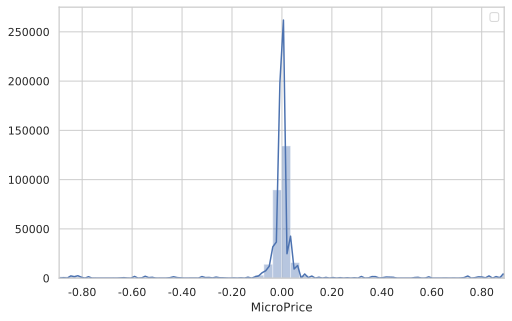

In [91]:
sns.set(style="whitegrid")    
_=fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 4)
g =sns.distplot(pct_change);
_=g.legend(bbox_to_anchor=(1, 1), ncol=1)
_=g.set(xlim = (np.min(pct_change),np.max(pct_change)))
_=xlabels = ['{:,.2f}'.format(x) + '' for x in g.get_xticks()*10000]
_=g.set_xticklabels(xlabels)

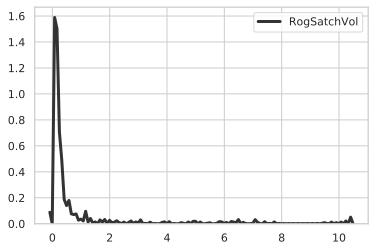

In [95]:

sns.kdeplot(vol, color=".2", linewidth=3);

In [100]:
from scipy.stats import gamma, expon, fatiguelife

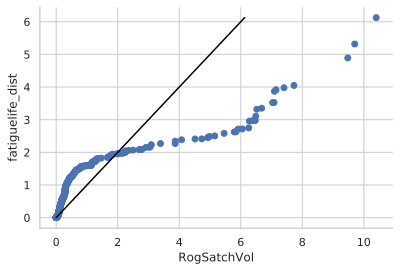

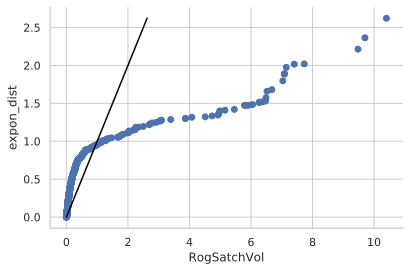

In [111]:
import seaborn as sns
from seaborn_qqplot import qqplot
qqplot(dfMerged, x='RogSatchVol', y=fatiguelife, height = 4, aspect = 1.5, display_kws={"identity":True})
qqplot(dfMerged, x='RogSatchVol', y=expon, height = 4, aspect = 1.5, display_kws={"identity":True})

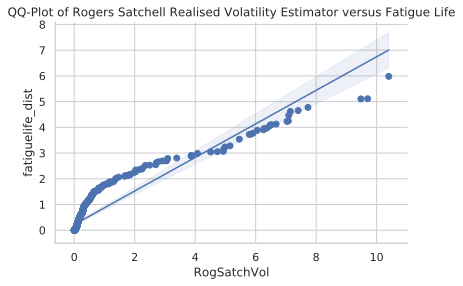

In [145]:
fig=qqplot(dfMerged, x='RogSatchVol', y=fatiguelife, height = 4, aspect = 1.5, display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})
_=plt.title('QQ-Plot of Rogers Satchell Realised Volatility Estimator versus Fatigue Life')

plt.savefig('/home/ak/Documents/Research/Papers/figures/' + 'RogSatchQQPlot' + '.png', dpi=150)


Finally, confidence intervals can be added for the linear regressions, we can precise the degree of confidence of the interval with the parameter ci a number in the interval [0,1] and the confidence intervals with degree of confidence 1 - ci/2 will be displayed:

In [131]:
import powerlaw
data = np.asarray(vol)# data can be list or numpy array
results = powerlaw.Fit(data,discrete=False)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.810332631275553
0.07342665168143188


Text(0.5, 0, 'Volatility')

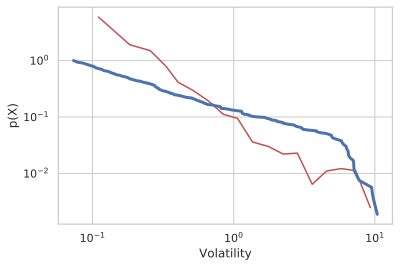

In [134]:
fig =results.plot_pdf( color='r')
FigCCDFmax =results.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
results.plot_ccdf(linewidth=3, label='Empirical Data')

fig.set_ylabel("p(X)")
fig.set_xlabel(r"Volatility")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


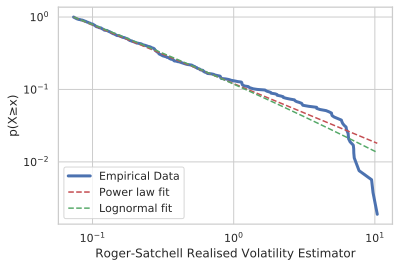

In [146]:
fit = powerlaw.Fit(data, discrete=False)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Roger-Satchell Realised Volatility Estimator")
handles, labels = fig.get_legend_handles_labels()
_=fig.legend(handles, labels, loc=3)
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + 'RogSatchDistroComp' + '.png', dpi=150)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


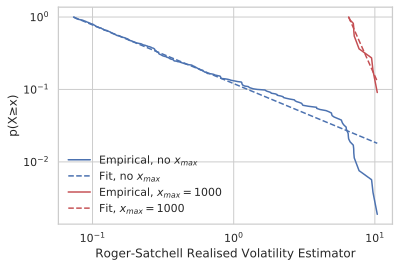

In [147]:
fit = powerlaw.Fit(data, discrete=False, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Roger-Satchell Realised Volatility Estimator")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + 'RogSatchDCumDFwithLimits' + '.png', dpi=150)
# figname = 'FigCCDFmax'
# savefig(figname+'.png', bbox_inches='tight')
# savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [93]:
# import seaborn as sns
# sns.set(style="white")

# # Load the example mpg dataset
# mpg = sns.load_dataset("mpg")

# # Plot miles per gallon against horsepower with other semantics
# sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=mpg)

In [61]:
np.random.exponential?

target = 250
beta = 1.0/target

Y = np.random.exponential(beta, 5000)

In [68]:
# Data and histograms
def generateData():
    global x,y
    target = 250
    beta = 1.0/target
    x = np.random.normal(size=250)
    y = np.random.exponential(beta,size=250)
    
def plotData():
    global x,y
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()

def generateCopulas():
    global x,y
    fig = plt.figure()

    frank = Copula(x,y,family='frank')
    uf,vf = frank.generate_uv(1000)
    fig.add_subplot(2,2,1)
    plt.scatter(uf,vf,marker='.',color='blue')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Frank copula')

    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')

#     gumbel = Copula(x,y,family='gumbel')
#     ug,vg = gumbel.generate_uv(1000)
#     fig.add_subplot(2,2,3)
#     plt.scatter(ug,vg,marker='.',color='green')
#     plt.ylim(0,1)
#     plt.xlim(0,1)
#     plt.title('Gumbel copula')

    plt.show()

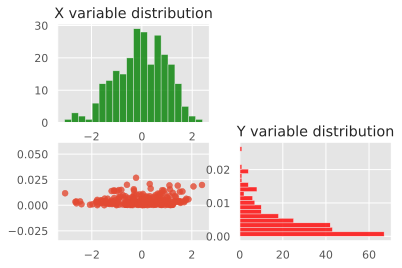

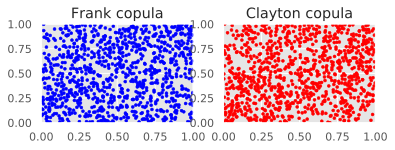

In [69]:
generateData()
plotData()
generateCopulas()

(1019,)